In [4]:
import numpy as np 
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt 
import seaborn as sns 
from rich.progress import track 
import pandas as pd 

## Naive Neural Network

Simple Example

In [5]:
X, y = make_classification(n_samples=600, n_features=10, n_informative=3, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [4]:
# Definindo uma função sigmoid
def sigmoid(Z):
    return 1.0 / (1+np.exp(-Z))

# Derivada da sigmoid
def sigmoid_derivative(output):
    return output * (1-output)

#Revisar essa parte
def cost_function(y, y_hat):
    return -np.sum( y*(np.log(y_hat) )+ (1-y)*np.log(1-y_hat) )/y.shape[0]

#Revisar essa parte
def cost_gradient(y, y_hat):
    return -np.divide(y, y_hat) + np.divide(1.0-y, 1.0 -y_hat)

In [10]:
np.random.seed(0)

# 1. Configurando a rede
size_input = X.shape[1] #Número de features do modelo
size_hidden_1 = 4   #Número de neurônios de uma camada
size_hidden_2 = 4   #Número de neurônios de uma camada
size_output = 1     #Dimensão do resultado do modelo

#Número de iterações do Gradient descendent
epochs = 100

# O passo do gradiente descendent
lr = 0.01

# Definindo os parâmetros da primeira camada
# Serão 4 vetores parâmetros
# Cada vetor parâmetro com 10+1 valores
# Um valor para cada featuree mais 1 para o bias
print(pd.DataFrame(W1))
W1 = np.random.random((size_hidden_1, size_input+1))

#A partir da 1 primeira camada será gerado um novo conjunto de dados com 4 features

#Nesta camada, serão 4 vetores parâmetros com 4 + 1 valores para cada parâmetro
W2 = np.random.random((size_hidden_2, size_hidden_1 + 1))

#Na saída, é gerado apenas um vetor parâmetro com 4+1 valores contidos
W3 = np.random.random((size_output, size_hidden_2+1))

# np.ones([10,1])

         0         1         2         3         4         5         6   \
0  0.548814  0.715189  0.602763  0.544883  0.423655  0.645894  0.437587   
1  0.528895  0.568045  0.925597  0.071036  0.087129  0.020218  0.832620   
2  0.461479  0.780529  0.118274  0.639921  0.143353  0.944669  0.521848   
3  0.568434  0.018790  0.617635  0.612096  0.616934  0.943748  0.681820   

         7         8         9         10  
0  0.891773  0.963663  0.383442  0.791725  
1  0.778157  0.870012  0.978618  0.799159  
2  0.414662  0.264556  0.774234  0.456150  
3  0.359508  0.437032  0.697631  0.060225  


In [21]:
losses = []
accuracies = []
from time import sleep
count = 0

#Número de iterações do Gradient descendent
epochs = 1

# Stochastic Gradient Descent

#Iterando sobre o número de epochs definido
for epoch in track(range(epochs), description='Training...'):
    epoch_losses = []
    epoch_hits = []
    # Iterando sobre cada linha do dataset
    for x_i, y_i in zip(X_train, y_train):
        x_i = x_i.reshape(1,-1)
        y_i = y_i.reshape(1,-1)
        count += 1
        if count == 2:
            break
        #  FORWARD PASS
    
        # Começando pela camada de entrada.
        # Nessa camada estão as features mais o bias
        print(x_i)
        A0 = np.hstack([x_i, np.ones((x_i.shape[0],1))]).T
        print(A0)
        #Camada 1
        #Multiplicando os dados de entrada ao parâmetro W1 calculado anteriomente
        print(W1)
        print(W1)
        Z1 = W1 @ A0
        #Aplicando esses dados parametrizados a função de ativação sigmoid
        A1 = sigmoid(Z1)
        #Após isso, adiciono o Bias a essa nova camada
        A1 = np.vstack([A1, np.ones((1, A1.shape[1]))])
        #Segunda camada
        # Nesta camada será inserida mais uma função de ativação sigmoid
        Z2 = W2 @ A1
        A2 = sigmoid(Z2)
        #Adicionando o bias mais uma vez a rede neural
        A2 = np.vstack([A2, np.ones((1,A2.shape[1]))])

        # Terceira camada
        Z3 = W3 @ A2
        A3 = sigmoid(Z3)
        # Pronto! Com isso, foi feita a primeira estimativa do ponto
        # Agora tentaremos estimar a melhor estimativa

        # BACKWARD PASS

        # Nesse passo, supomos que exista uma função de erro em função do output
        # Calculando a derivada de saída em relação ao valor do ponto
        # Vamos usar regra da cadeia para calcular p gradiente da função erro
        
        # Derivada dos valores de saída em relação ao erro
        dA3 = cost_gradient(y_i, A3) # error 
  
        #Derivada do erro em relação a dZ3
        dZ3 = dA3 * sigmoid_derivative(sigmoid(Z3))
  
        # Derivada do erro em relação ao parâmetro W3
        dW3 = dZ3 @ A2.T

        # Derivada do erro em relação a dA2
        # Neste caso, estamos calculando a derivada desconsiderando o bias
        dA2 = W3[:, :-1].T @ dZ3
        # Derivada do erro em relação a variável Z2
        dZ2 = dA2 * sigmoid_derivative(sigmoid(Z2))
        # Derivada do erro em relação ao parâmetro W2
        dW2 = dZ2 @ A1.T
        # Derivada do erro em relação a A1
        dA1 = W2[:, :-1].T @ dZ2
        # Derivada do erro em relação a dZ2
        dZ1 = dA1 * sigmoid_derivative(sigmoid(Z1))
        # Derivada do parâmetro W1 em relação ao erro
        dW1 = dZ1 @ A0.T

        ############# PREDICT #############
        #Arredondando o valor da predição
        pred = A3.squeeze().round()
        # Adicionando o True or False para as predições feitas corretamente
        epoch_hits.append(pred == y_i)
        # Adicionando o erro de cada predição
        epoch_losses.append(cost_function(y_i, A3))
    
        ############ ATUALIZANDO OS PARÂMETROS ##############
        # Dando o próximo passo do gradient descendent
        W1 -= lr * dW1
        W2 -= lr * dW2
        W3 -= lr * dW3

    losses.append(np.mean(epoch_losses))
    accuracies.append(np.mean(epoch_hits))

Output()

[[-0.21174612  0.98276444  2.04171249 -0.59680612  0.69181401  0.2219801
  -1.20482688  0.30029883  0.9659918   1.10494962]]
[[-0.21174612]
 [ 0.98276444]
 [ 2.04171249]
 [-0.59680612]
 [ 0.69181401]
 [ 0.2219801 ]
 [-1.20482688]
 [ 0.30029883]
 [ 0.9659918 ]
 [ 1.10494962]
 [ 1.        ]]
[[ 1.44759843  0.02385866 -1.0409444   0.82314546  0.41834331  0.83026029
   0.2884856   2.04423226 -0.12224157 -0.14511949  1.4727321 ]
 [ 0.52685471  0.34635389  0.47718571 -1.01895928 -0.9435052  -0.13708169
   0.34079043  1.8466132   1.26768591  0.07719031  0.77823328]
 [ 0.3962108   0.49931741  0.09956376  1.00387427  0.61154768  1.16228068
   0.61810335 -0.48272239 -0.08362334  0.99401846  0.2492968 ]
 [ 1.27967568 -0.07919469 -0.70485851  0.50887635  0.09316048  0.77082161
   0.11903424  2.00814096 -0.07432615  0.31784987  0.55163963]]
[[ 1.44759843  0.02385866 -1.0409444   0.82314546  0.41834331  0.83026029
   0.2884856   2.04423226 -0.12224157 -0.14511949  1.4727321 ]
 [ 0.52685471  0.346353

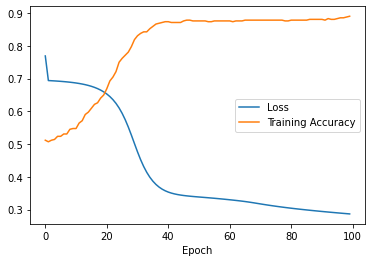

In [70]:
fig, ax = plt.subplots()
sns.lineplot(x=range(len(losses)), y=losses, ax=ax, label='Loss')
sns.lineplot(x=range(len(accuracies)), y=accuracies, ax=ax, label='Training Accuracy')
ax.set_xlabel('Epoch')
plt.show()
plt.close('all')

In [75]:
#Com isso, temos os parâmetros do modelo estimados

#Vamos fazer predições com esses modelos

A0 = np.hstack([X_test, np.ones((X_test.shape[0],1))]).T

#Primeira camada
Z1 = W1 @ A0
A1 = sigmoid(Z1)
A1 = np.vstack([A1, np.ones((1, A1.shape[1]))])

#Segunda camada
Z2 = W2 @ A1 
A2 = sigmoid(Z2)
A2 = np.vstack([A2, np.ones((1, A2.shape[1]))]) 

# Terceira camada
Z3 = W3 @ A2 
A3 = sigmoid(Z3)

In [76]:
accuracy_score(y_test, A3.squeeze().round())

0.8777777777777778